<a href="https://colab.research.google.com/github/soujanya-vattikolla/Machine-Learning-Tutorial/blob/main/DummyVariables%26OneHotEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Categorical Variables

Nominal: 

They do not have any order relationship between the variables.
Ex: male, female, red, green, blue

Ordinal:

They have some sort of numerical ordering between the variables.
Ex: high, medium and low

In [61]:
# import required libraries

import pandas as pd


In [62]:
homeprice_df = pd.read_csv('homeprices.csv')
homeprice_df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [63]:
# Using pandas to create dummy variables 
# create a dummy column for town column
dummies_town = pd.get_dummies(homeprice_df.town)
dummies_town

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [64]:
# combining the two dataframes

merge_df = pd.concat([homeprice_df,dummies_town],axis='columns')
merge_df

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [65]:
# we need to drop the town column

final_df = merge_df.drop(['town','west windsor'],axis='columns')
final_df

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [66]:
# creating a linear regression model

from sklearn.linear_model import LinearRegression

In [67]:
model = LinearRegression()

In [68]:
X = final_df.drop(['price'],axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [69]:
y = final_df['price']
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [70]:
# training the model
model.fit(X,y)

LinearRegression()

Predict the price of 2800 sqr ft home in robbinsville

In [71]:
model.predict([[2800,0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([590775.63964739])

Predict the price of 3400 sqr ft home in west windsor

In [72]:
model.predict([[3400,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([681241.66845839])

In [73]:
# to find the score of the model

model.score(X,y)

0.9573929037221873

We can observe that model is 95% accurate.

Using sklearn **OneHotEncoder**

In [74]:
homeprice_df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [75]:
# label encoding for the town column

from sklearn.preprocessing import LabelEncoder

In [76]:
labelencode = LabelEncoder() # creating a object

In [77]:
homeprice_lblencodedf = homeprice_df  # creating a new dataframe
homeprice_lblencodedf.town = labelencode.fit_transform(homeprice_lblencodedf.town)
homeprice_lblencodedf.town

0     0
1     0
2     0
3     0
4     0
5     2
6     2
7     2
8     2
9     1
10    1
11    1
12    1
Name: town, dtype: int64

In [78]:
homeprice_lblencodedf

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [79]:
# Creating a X variable
X = homeprice_lblencodedf[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [80]:
# Creating a y variable

y = homeprice_lblencodedf[['price']]
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000
5,585000
6,615000
7,650000
8,710000
9,575000


In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [82]:
# creating a OneHotEncoder object
ohe = OneHotEncoder()
ct = ColumnTransformer([('town', ohe, [0] )], remainder='passthrough')

In [83]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [84]:
# dropping the first column

X = X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [85]:
# training on model
model.fit(X,y)

LinearRegression()

Predict 3400 sqr ft home in west windsor

In [86]:
model.predict([[0,1,3400]])

array([[681241.6684584]])

Predict 2800 sqr ft home in robbinsville

In [87]:
model.predict([[1,0,2800]])

array([[590775.63964739]])

**Exercise**

In [88]:
car_df = pd.read_csv('carprices.csv')
car_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [89]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

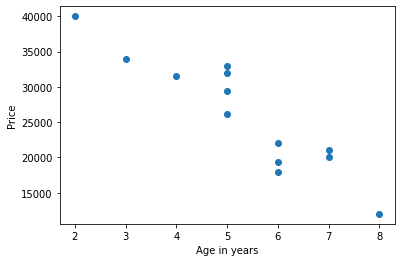

In [103]:
%matplotlib inline
plt.scatter(car_df['Age(yrs)'],car_df['Sell Price($)'])
plt.xlabel('Age in years')
plt.ylabel('Price')

In [91]:
# Using pandas to create dummy variables 
dummies_model = pd.get_dummies(car_df['Car Model'])
dummies_model

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [92]:
# combining the two dataframes
mergecar_df = pd.concat([car_df,dummies_model],axis='columns')
mergecar_df


,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [93]:
# we need to drop the car model column

finalcar_df = mergecar_df.drop(['Car Model','Mercedez Benz C class'],axis='columns')
finalcar_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [94]:
carmodel = LinearRegression()

In [95]:
X = finalcar_df.drop(['Sell Price($)'],axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [96]:
y = finalcar_df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [97]:
carmodel.fit(X,y)

LinearRegression()

In [98]:
carmodel.score(X,y)

0.9417050937281083

Price of mercedez benz that is 4 yr old with mileage 45000

In [99]:
carmodel.predict([[45000,4,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([36991.31721061])

Price of BMW X5 that is 7 yr old with mileage 86000

In [100]:
carmodel.predict([[86000,7,0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([11080.74313219])